In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re #regular expression
from collections import defaultdict

In [2]:
df_job_description = pd.read_csv('./amazon_jobs_dataset.csv')
df_job_description.head() #print top 5 rows of the data frame

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


# Q1.What programming languages and technologies are required at Amazon?¶

In [3]:
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [4]:
qualifications = df_job_description['BASIC QUALIFICATIONS'].tolist()+df_job_description['PREFERRED QUALIFICATIONS'].tolist()
# qualifications_string = "".join(re.sub('·', '', str(v)) for v in qualifications).lower() # joining the list to a single string and lower case the letter
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower() # joining the list to a single string and lower case the letter

In [5]:
wordcount = dict((x,0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1 #find the words and if present in the dictionary increase the count
# print
print(wordcount)


# dict={};
# for x in languages_list:
#     dict[x]=0
# for x in languages_list:
#     if x in dict:
#         dict[x]=dict[x]+1
# wordcount=dict

# print(dict)
# print(wordcount)

C:\Users\Xenolt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


In [6]:
# sort the dict
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True) #sort according to the value 
#key=lambda kv: kv[1] this is a lambda function, here we use it to make value of the wordcount as key for sorting

In [7]:
# make a new dataframe from programming languages and their popularity
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
# df_popular_programming_lang = df_popular_programming_lang[::-1] #print all in reverse order

In [8]:
print(df_popular_programming_lang)

      Language  Popularity
0         Java        3065
1          C++        1892
2       Python        1187
3            C        1010
4           C#         991
5   Javascript         832
6         Ruby         570
7         Perl         529
8       Hadoop         219
9        Spark         148
10       Mysql          74
11         Php          60
12       Swift          56
13  Objectivec          55
14      Matlab          24
15     Mongodb          19
16         Pig          13
17      Cosmos           1


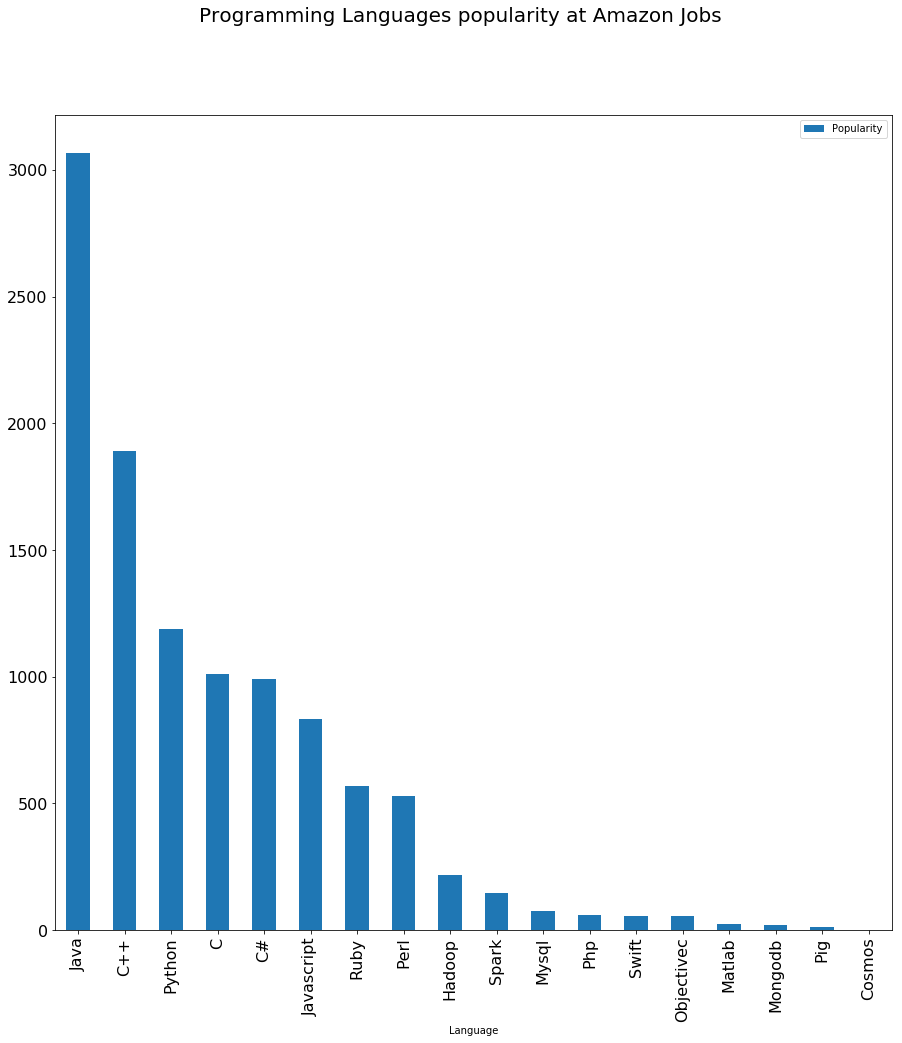

In [9]:
# plot
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=True)
# add a suptitle
plt.suptitle("Programming Languages popularity at Amazon Jobs", fontsize=20)
# # set xlabel to ""
# plt.xlabel("")
# change xticks fontsize to 14
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# finally show the plot
plt.show()

In [10]:
# basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

# Q2. How many years of experiences are asked for Amazon Jobs?¶

In [11]:
years = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]) ', qualifications_string):
     years[w] += 1

In [12]:
years = sorted(years.items(), key=lambda kv: kv[1], reverse=True)

In [13]:
df_years = pd.DataFrame(years,columns=['Years of experience','Popularity'])
print(df_years)

  Years of experience  Popularity
0                   3         460
1                   5         373
2                   2         349
3                   1         291
4                   7         240
5                   6         201
6                   0         116
7                   4         106
8                   8          51
9                   9          10


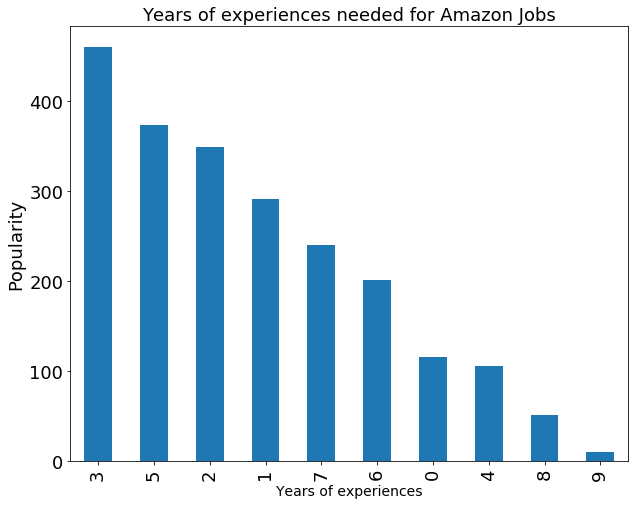

In [14]:
df_years.plot.bar(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False)
# add a title
plt.title("Years of experiences needed for Amazon Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Years of experiences", fontsize=14)
plt.ylabel("Popularity",fontsize=18)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

# Q3.Which location does Amazon need more employee?¶

In [15]:
# where is most job located
threshold = 10
location_value_counts = df_job_description.location.value_counts()
# print(len(location_value_counts))
to_remove = location_value_counts[location_value_counts <= threshold].index
df_job_description['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = df_job_description.location.value_counts()
# print(len(location_value_counts))

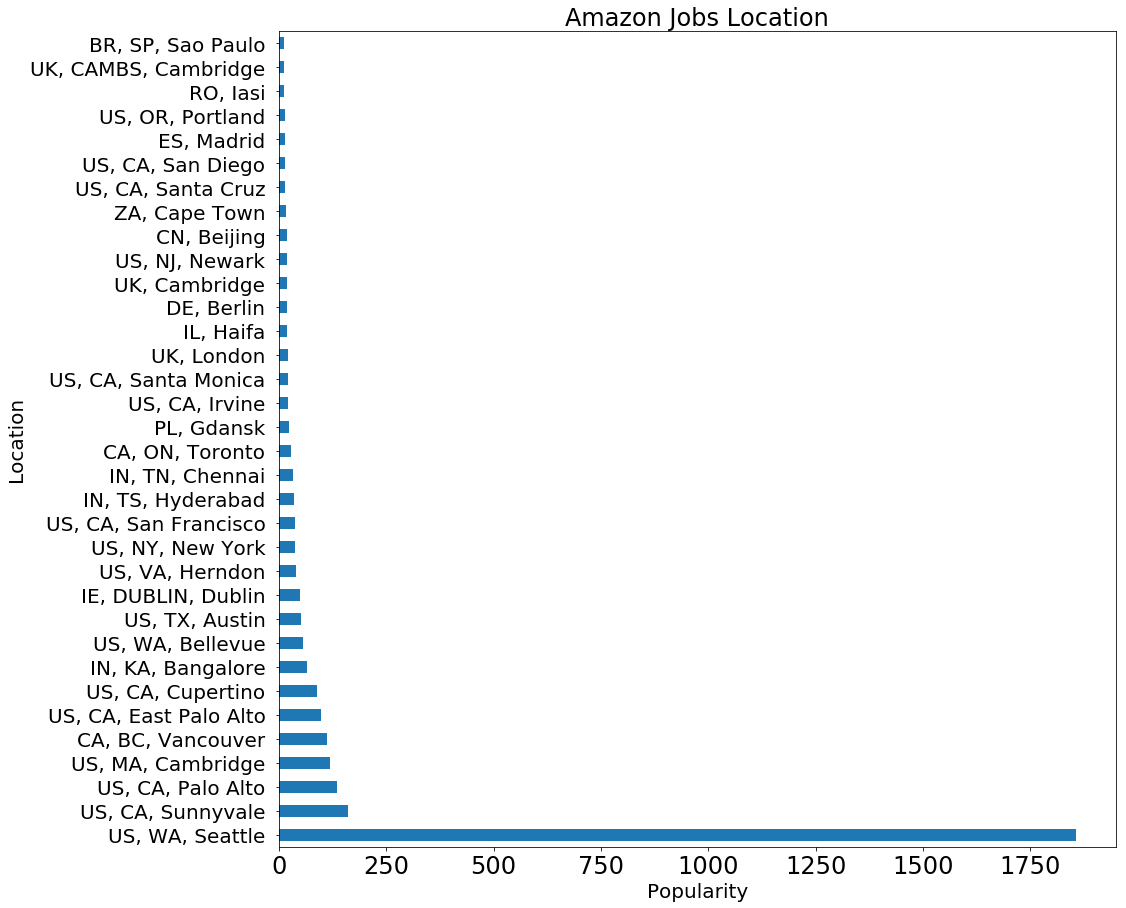

In [16]:
location_value_counts.plot.barh(figsize=(15, 15)) #fig size in inches
# add a suptitle
plt.title("Amazon Jobs Location", fontsize=24)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
# change xticks fontsize to 14
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
# finally show the plot
plt.show()